# Assignment 5 (ML 7-11)

### 2.1 In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
from __future__ import print_function

In [2]:
import pandas
with open('/Users/abpandey4/Downloads/nba_2013.csv', "r") as csvfile:
    nba_raw = pandas.read_csv(csvfile)

In [3]:
nba = nba_raw.fillna(0)

In [4]:
nba = nba.convert_objects(convert_numeric=True).dropna()

/Users/abpandey4/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
print("nba.columns.values:", nba.columns.values)

nba.head(5)

nba.columns.values: ['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
import math

selected_player = nba[nba["player"] == "LeBron James"].iloc[0]
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast',
 'stl', 'blk', 'tov', 'pf', 'pts']

def euclidean_distance(row):
    inner_value = 0
    for k in distance_columns:
        inner_value += (row[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)

lebron_distance = nba.apply(euclidean_distance, axis=1)
print("lebron_distance[:5]:\n", lebron_distance[:5])

lebron_distance[:5]:
 0    3475.792868
1    3148.395020
2    3161.567361
3    1189.554979
4    3216.773098
dtype: float64


In [7]:
nba_numeric = nba[distance_columns]
nba_numeric.head(5)

nba_normalized = (nba_numeric - nba_numeric.mean()) / nba_numeric.std()
nba_normalized.head(5)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,-0.835906,0.384886,-0.862207,-0.435088,-0.738401,-0.768505,0.325957,-0.700282,-0.716608,0.120520,...,-0.151926,0.260690,-0.129462,-0.013116,-0.645220,-0.468056,0.061410,-0.667650,0.226515,-0.734621
1,-1.550487,1.095711,-0.187863,-0.045011,-0.581271,-0.649215,0.667749,-0.778936,-0.829601,-1.390497,...,-0.522588,1.387883,0.187020,0.565852,-0.530733,0.020680,1.065446,-0.013760,1.363938,-0.534801
2,0.116868,-0.010016,-0.457600,-0.308035,-0.290291,-0.405214,0.833763,-0.778936,-0.829601,-1.390497,...,-0.250457,0.743773,0.283340,0.436083,-0.568895,-0.439307,0.385292,-0.524113,0.029924,-0.328603
3,0.355062,0.779789,1.599148,1.465144,1.577804,1.590172,0.238067,1.737992,1.430256,1.027130,...,0.575320,-0.383420,0.462221,0.216475,1.033919,-0.123066,-0.683520,1.182380,0.423107,1.729123
4,-0.359519,0.108454,0.149309,-0.319180,-0.331028,-0.475703,1.087666,-0.778936,-0.822068,-1.390497,...,0.673851,0.614951,0.138859,0.291341,-0.553630,-0.468056,0.709175,-0.141348,1.139262,-0.400878


In [8]:
from scipy.spatial import distance

In [9]:
nba_normalized.fillna(0, inplace=True)

In [10]:
lebron_normalized = nba_normalized[nba["player"] == "LeBron James"]


In [11]:
euclidean_distances = nba_normalized.apply(lambda row: distance.euclidean(row, lebron_normalized), axis=1)
distance_frame = pandas.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)

second_smallest = distance_frame.iloc[1]["idx"]

most_similar_to_lebron = nba.loc[int(second_smallest)]["player"]
print("most_similar_to_lebron:", most_similar_to_lebron)

most_similar_to_lebron: Carmelo Anthony


In [12]:
import random
from numpy.random import permutation

In [13]:
random_indices = permutation(nba.index)

In [14]:
test_cutoff = math.floor(len(nba)/3)

In [15]:
test = nba.loc[random_indices[1:test_cutoff]]

In [16]:
train = nba.loc[random_indices[test_cutoff:]]

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast',
 'stl', 'blk', 'tov', 'pf', 'pts']


In [19]:
y_column = ['pts']

In [20]:
knn = KNeighborsRegressor(n_neighbors=5)

In [21]:
knn.fit(train[x_columns], train[y_column])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [22]:
predictions = knn.predict(test[x_columns])

print("predictions[:5]:\n", predictions[:5])

predictions[:5]:
 [[ 30.2]
 [ 22.8]
 [  2.4]
 [483.6]
 [749.8]]


In [23]:
actual = test[y_column]

mse = (((predictions - actual) ** 2).sum()) / len(predictions)

print("actual[:20]:\n", actual[:20])
print("mse:", mse)

actual[:20]:
       pts
358    44
367    32
240     0
81    470
30    660
144   970
145    19
402  1264
133  2593
423  1465
476   939
255   514
378    79
415    89
430   703
416  1304
273   890
479   490
198  1081
86    490
mse: pts    6263.672201
dtype: float64


### 2.2 In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [24]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abpandey4/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

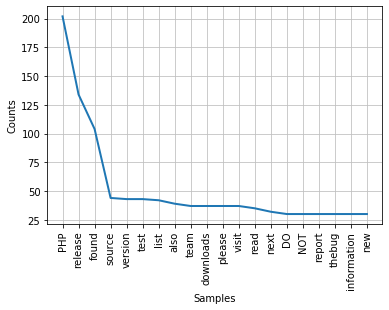

In [26]:
freq.plot(20,cumulative=False)

### 2.3 In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

## The raw image is available in spicy.misc package with the name face.

In [27]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

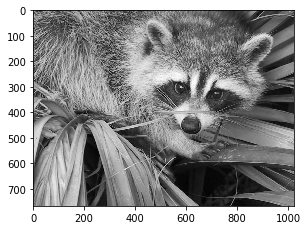

In [28]:
f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [29]:
rows = f.shape[0]
cols = f.shape[1]


In [30]:
image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols);

In [31]:
plt.imsave('compressed_racoon.png',labels);

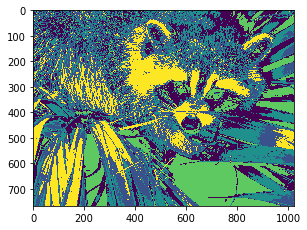

In [32]:
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

### 2.4 In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [33]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [34]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [36]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [37]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

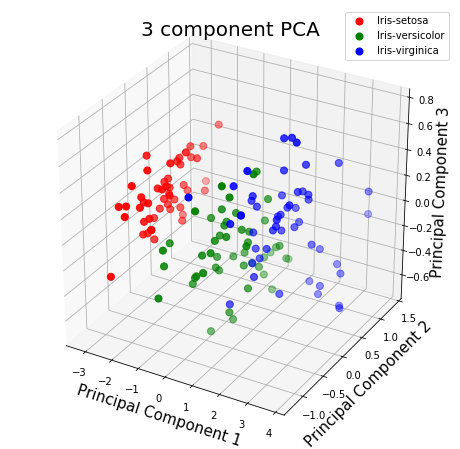

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()


### 2.5 In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.


In [40]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv("shampoo-sales.csv",index_col =0, parse_dates=[0],date_parser = parser)

FileNotFoundError: [Errno 2] File b'shampoo-sales.csv' does not exist: b'shampoo-sales.csv'